# Introduction


Name: Nicholas Fullerton

This Project is surrounded around NFL Quarterback Game Log dataset. Meaning every quarterback's game stats for every game he played.

Link : https://www.kaggle.com/datasets/kendallgillies/nflstatistics

We will be answering three questions regarding the dataset

1. Which team caused the most trouble to quarterbacks?
2. Which city was the most difficult to play at?
3. Which city was the easiest to play at?


# Libraries and Dataset

We will begin by importing the libraries we need and retrieving our dataset.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
main_df = pd.read_csv('Game_Logs_Quarterback.csv')

# View The Data

Now let's take a look at our data and view the columns that we will be working with.

In [20]:
main_df.head()

,Player Id,Name,Position,Year,Season,Week,Game Date,Home or Away,Opponent,Outcome,...,Ints,Sacks,Sacked Yards Lost,Passer Rating,Rushing Attempts,Rushing Yards,Yards Per Carry,Rushing TDs,Fumbles,Fumbles Lost
0,jaredzabransky/2495791,"Zabransky, Jared",NaN,2007,Preseason,1,08/11,Home,CHI,L,...,--,--,--,0.0,--,--,--,--,--,--
1,jaredzabransky/2495791,"Zabransky, Jared",NaN,2007,Preseason,2,08/18,Away,ARI,W,...,0,0,0,46.9,--,--,--,--,--,--
2,jaredzabransky/2495791,"Zabransky, Jared",NaN,2007,Preseason,3,08/25,Home,DAL,W,...,--,--,--,0.0,--,--,--,--,--,--
3,jaredzabransky/2495791,"Zabransky, Jared",NaN,2007,Preseason,4,08/30,Away,TB,L,...,1,2,13,50.8,2,17,8.5,0,--,--
4,billdemory/2512778,"Demory, Bill",NaN,1974,Regular Season,1,09/15,Away,KC,L,...,--,--,--,0.0,--,--,--,--,--,--


In [21]:
main_df.columns

Index(['Player Id', 'Name', 'Position', 'Year', 'Season', 'Week', 'Game Date',
       'Home or Away', 'Opponent', 'Outcome', 'Score', 'Games Played',
       'Games Started', 'Passes Completed', 'Passes Attempted',
       'Completion Percentage', 'Passing Yards', 'Passing Yards Per Attempt',
       'TD Passes', 'Ints', 'Sacks', 'Sacked Yards Lost', 'Passer Rating',
       'Rushing Attempts', 'Rushing Yards', 'Yards Per Carry', 'Rushing TDs',
       'Fumbles', 'Fumbles Lost'],
      dtype='object')

### Let's Talk About Our Data

I have shown the first 5 rows and the column names.

The Main columns we will need to worry about is Name, Year, Season, Home or Away, Opponent, Passes Attempted, Passer Rating

- Name : Name of the player
- Year : What year the season was
- Season : Whether the game was played in the Preseason, Regular Season, Postseason, or Pro Bowl
- Home or Away : Whether the game was played home or away
- Opponent : What team the quarterback played that game
- Passes Attempted : How many passes the quarterback threw
- Passer Rating : The measure of the performance of the quarterback

# Data Wrangling

We will now need to wrangle our data so we can derive the proper results from them.

We will create a new dataset to answer question 1, and another dataset to answer questions 2 and 3

Before we create two new datasets, I will do some data wrangling on the main dataset as the wrangling will be applied to both new datasets.

### Main Data Wrangling

1. I will drop the columns that we don't need to worry about.
2. I will drop any row in the column Season that contains Preseason and Pro Bowl. Regular Season and Postseason games contain the starting quarterbacks and are the most important games in a NFL season.
3. I will drop any row where the Year is under 2002. This is because in today's NFL, the most recent team added in the NFL was the Houston Texans, where their first season was in 2002. I only want to work with current teams in the NFL.
4. I will drop any row where the Passes Attempted is under 15, I just want data where the quarterback actually threw the ball plenty of times to create an accurate Passer Rating. 

In [22]:
main_df = main_df[['Name', 'Year', 'Season', 'Home or Away', 'Opponent', 'Passes Attempted', 'Passer Rating']].copy()

In [23]:
main_df.head()

,Name,Year,Season,Home or Away,Opponent,Passes Attempted,Passer Rating
0,"Zabransky, Jared",2007,Preseason,Home,CHI,--,0.0
1,"Zabransky, Jared",2007,Preseason,Away,ARI,4,46.9
2,"Zabransky, Jared",2007,Preseason,Home,DAL,--,0.0
3,"Zabransky, Jared",2007,Preseason,Away,TB,22,50.8
4,"Demory, Bill",1974,Regular Season,Away,KC,--,0.0


In [24]:
badSeason = main_df[ (main_df['Season'] == 'Preseason') | (main_df['Season'] == 'Pro Bowl')].index
main_df.drop(badSeason, inplace=True)
main_df.Season.unique()

array(['Regular Season', 'Postseason'], dtype=object)

In [25]:
badYear = main_df[(main_df['Year'] < 2002)].index
main_df.drop(badYear, inplace=True)
main_df.Year.unique()

array([2016, 2014, 2005, 2004, 2003, 2002, 2011, 2010, 2009, 2015, 2013,
       2008, 2007, 2006, 2012], dtype=int64)

In [26]:
invalidAttempt = main_df[(main_df['Passes Attempted'] == '--')].index
main_df.drop(invalidAttempt, inplace=True)
main_df['Passes Attempted'].unique()

array(['36', '29', '8', '19', '28', '7', '22', '13', '1', '24', '47',
       '34', '30', '35', '44', '42', '38', '18', '27', '25', '23', '41',
       '57', '33', '48', '5', '11', '21', '20', '12', '31', '43', '37',
       '26', '40', '39', '32', '45', '17', '14', '16', '2', '52', '46',
       '6', '49', '10', '9', '54', '0', '4', '15', '61', '3', '50', '51',
       '56', '53', '63', '60', '58', '65', '59', '62', '55', '64'],
      dtype=object)

In [27]:
main_df['Passes Attempted'] = pd.to_numeric(main_df['Passes Attempted'])
smallAttempt = main_df[(main_df['Passes Attempted'] < 15)].index
main_df.drop(smallAttempt, inplace=True)
main_df['Passes Attempted'].unique()

array([36, 29, 19, 28, 22, 24, 47, 34, 30, 35, 44, 42, 38, 18, 27, 25, 23,
       41, 57, 33, 48, 21, 20, 31, 43, 37, 26, 40, 39, 32, 45, 17, 16, 52,
       46, 49, 54, 15, 61, 50, 51, 56, 53, 63, 60, 58, 65, 59, 62, 55, 64],
      dtype=int64)

### Question 1 Data Wrangling

This wrangling is quite simple, I will create the new dataset with passing rating averages for each team.

In [28]:
q1_df = main_df[['Opponent', 'Passer Rating']].copy()
q1_df = q1_df.groupby(['Opponent']).mean()
q1_df.head()

,Passer Rating
Opponent,
ARI,84.672251
ATL,91.530319
BAL,79.683962
BUF,81.402475
CAR,84.730526


### Question 2 and 3 Data Wrangling

1. We will first drop any row where the game was played at home, since we only want to look at games played by an opposing quarterback in away territory.
2. Then we will wrangle the data with passing rating averages for each team

In [29]:
badGame = main_df[ (main_df['Home or Away'] == 'Home')].index
q23_df = main_df.drop(badGame)
q23_df = q23_df[['Opponent', 'Passer Rating']].copy()
q23_df = q23_df.groupby(['Opponent']).mean()
q23_df.head()

,Passer Rating
Opponent,
ARI,84.211579
ATL,91.379592
BAL,73.718447
BUF,75.620755
CAR,83.275556


# Show and Visualize the Results

Let's take a look at our results!!!!!!!!!!!!!

### Question 1 Visualization and Result

In [30]:
q1_df.sort_values(by=['Passer Rating'], inplace=True)
q1_df.head()

,Passer Rating
Opponent,
BAL,79.683962
GB,81.124742
SEA,81.280303
BUF,81.402475
PIT,82.169118


<AxesSubplot:xlabel='Opponent'>

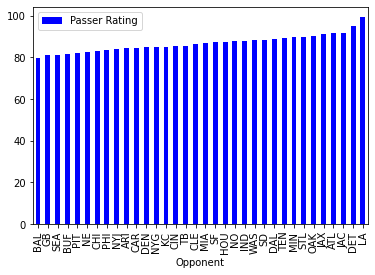

In [31]:
q1_df.plot.bar(color='blue')

### Question 2 and 3 Visualization and Results

In [32]:
q23_df.sort_values(by=['Passer Rating'], inplace=True)
q23_df.head()

,Passer Rating
Opponent,
BAL,73.718447
SEA,75.469697
BUF,75.620755
GB,75.680612
JAX,76.800000


In [33]:
q23_df.tail()

,Passer Rating
Opponent,
DAL,89.839796
ATL,91.379592
OAK,91.538889
DET,93.691304
LA,95.112500


<AxesSubplot:xlabel='Opponent'>

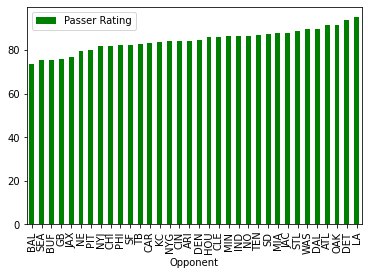

In [34]:
q23_df.plot.bar(color='green')

# Conclusion

Here are the results for each question

1. The data shows that quarterbacks had the most trouble when facing Baltimore
2. The data shows that quarterbacks had the least success when playing in Baltimore
3. The data shows that quarterbacks had the most success when playing in Los Angeles